**<p style = "text-align: center">TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN - ĐẠI HỌC QUỐC GIA TPHCM</p>**

# **<p style = "text-align: center">LẬP TRÌNH KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">Đồ án Cuối kì</p>**
### <p style = "text-align: center"> <b>Đề tài:</b> Xử lí, phân tích và khám phá dữ liệu về sức khỏe tinh thần của nhân viên công nghệ (Mental Health in Tech)</p>
*<p style = "text-align: center">Bộ dữ liệu này là từ một cuộc khảo sát năm 2014 đo lường thái độ đối với sức khỏe tâm thần và tần suất rối loạn sức khỏe tâm thần của những người làm việc trong lĩnh vực công nghệ.</p>*
**Sinh viên thực hiện:**

| Mã số sinh viên | Họ và tên |
| --- | --- |
| 21120576 | Trần Đình Nhật Trí |
| 21120590 | Nguyễn Thủy Uyên |
| 21120501 | Nguyễn Ngọc Gia Minh |

## Import thư viện

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_df = pd.read_csv('survey.csv')
raw_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Với mỗi cột có kiểu là dữ liệu số, những giá trị trong cột đó được phân bố như thế nào?
Để trả lời câu hỏi này, trước tiên ta sẽ lọc những cột có kiểu dữ liệu số có trong `raw_df`:

In [3]:
numeric_cols = raw_df.select_dtypes(include='number')
numeric_cols

,Age
0,37
1,44
2,32
3,31
4,31
...,...
1254,26
1255,32
1256,34
1257,46


Như ta thấy, chỉ có duy nhất cột `Age` là cột có dữ liệu số.
Ta sẽ kiểm tra tổng quan giá trị trong `Age` được phân bố như thế nào:

In [4]:
# plt.figsize=(15,2)
# sns.histplot(numeric_col, x='Age')
pd.set_option('display.float_format', lambda x : '%.2f' %x)
numeric_cols.describe()

,Age
count,1259.00
mean,79428148.31
std,2818299442.98
min,-1726.00
25%,27.00
50%,31.00
75%,36.00
max,99999999999.00


Trong cột `Age` có dữ liệu bất bình thường, nguyên nhân là do: Số tuổi **lớn nhất** `Max` là rất lớn và số tuổi **bé nhất** `Min` là một số âm. Hai giá trị này là rất vô lý khi nó xuất hiện trong thuộc tính độ tuổi.

Tiếp theo ta kiểm tra tỉ lệ missing values chiếm trong cột này là bao nhiêu:

In [5]:
percent_missing = numeric_cols.isnull().sum() * 100 / len(numeric_cols)
percent_missing

Age   0.00
dtype: float64

Không có missing values nào tồn tại trong `Age`.

**Nhận xét:**
- Cột dữ liệu số trong bộ dữ liệu này là bất bình thường do xuất hiện những giá trị vô lý trong bảng dữ liệu, khiến dữ liệu bị sai lệch. Chúng được gọi là các giá trị ngoại lai `outliers`.
- Độ tuổi làm việc trong môi trường công nghệ thường nằm trong phạm vi **18 đến 75 tuổi**. Do đó trong quá trình tìm hiểu dữ liệu, ta sẽ cần phải loại bỏ những `outliers` này.

## Với các cột dữ liệu kiểu categorical, ta xem xét sự phân bố

In [6]:
cate_cols =  raw_df.select_dtypes(exclude = 'number')
cate_cols

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,f,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


### Kiểm tra tỉ lệ giá trị bị thiếu ở các cột kiểu categorical

In [7]:
def missing_ratios(col):
    return col.isnull().sum() * 100 / len(col)


cate_cols.agg(missing_ratios)

Timestamp                    0.00
Gender                       0.00
Country                      0.00
state                       40.91
self_employed                1.43
family_history               0.00
treatment                    0.00
work_interfere              20.97
no_employees                 0.00
remote_work                  0.00
tech_company                 0.00
benefits                     0.00
care_options                 0.00
wellness_program             0.00
seek_help                    0.00
anonymity                    0.00
leave                        0.00
mental_health_consequence    0.00
phys_health_consequence      0.00
coworkers                    0.00
supervisor                   0.00
mental_health_interview      0.00
phys_health_interview        0.00
mental_vs_physical           0.00
obs_consequence              0.00
comments                    86.97
dtype: float64

### Trước tiên, ta quan sát thấy ở cột Giới tính (**Gender**) các giá trị chỉ giới tính Male và Female thiếu sự đồng nhất (male, M, f, Male, Trans woman ...). Ta sẽ xử lý bằng cách đưa tất cả về hoặc là Male hoặc là Female hoặc là Others

In [8]:
cate_cols['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [9]:
# define valid vals for male, female group
male_vals = ['M', 'Male', 'male', 'm', 'Male-ish', 'maile', 'Mal', 'Male (CIS)', 'Make', 'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis man']
female_vals = ['Female', 'female', 'F', 'Cis Female', 'Femake', 'woman', 'Female ', 'cis-female/feme', 'Female (cis)', 'femail']

def standard_gender(gender):
    if gender in male_vals:
        return 'Male'
    elif gender in female_vals:
        return 'Female'
    else:
        return'Others'

raw_df['Gender'] = raw_df['Gender'].map(standard_gender)

In [10]:
raw_df['Gender'].unique()

array(['Female', 'Male', 'Others'], dtype=object)

### Tiếp đến với 2 cột dữ liệu **Country**, **state**, ta có sự nghi ngờ như sau: đối với các dòng dữ liệu có **Country** không là United States thì giá trị ở cột **state** sẽ là Nan value

Tiến hành kiểm định giả thiết bằng cách lọc ra tất cả dòng dữ liệu có country không là United States và tính missing ratio ở cột state nếu bằng 100% thì giả định trên **Đúng**

In [11]:
raw_df['Country'].value_counts()

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

In [12]:
country_not_US = raw_df[raw_df['Country'] != 'United States']['state']
print(f'missing ratio of state if country is not United States: {country_not_US.isnull().sum() * 100 / len(country_not_US)}')

missing ratio of state if country is not United States: 99.21259842519684


#### Xem xét sự phân bố các bang nếu dữ liệu ở Country là United States

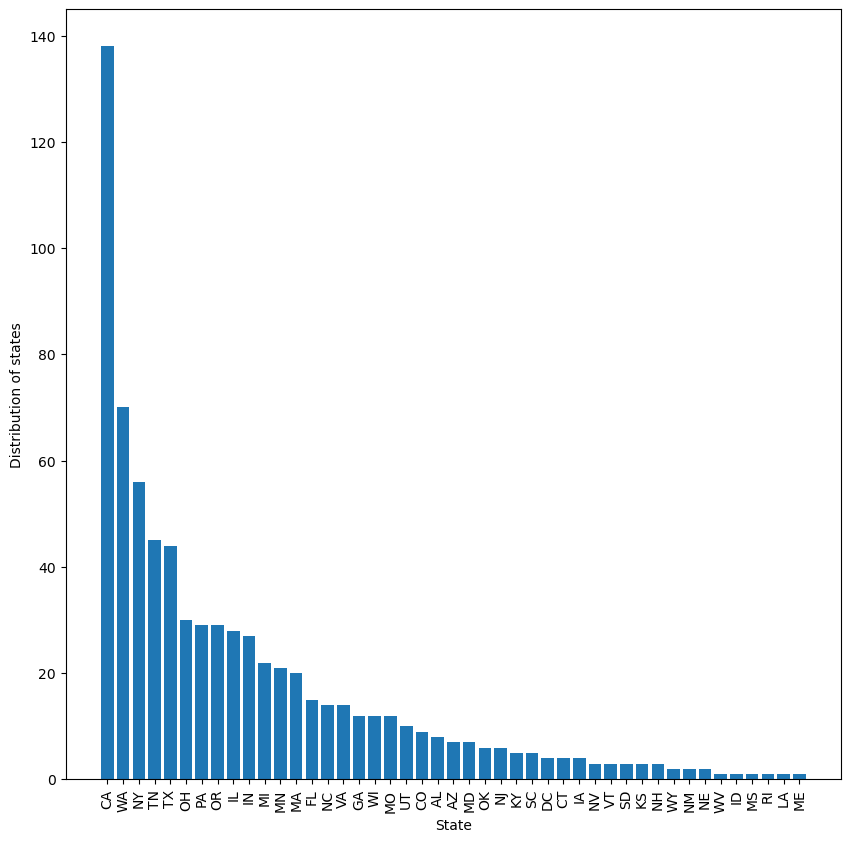

In [13]:
US_state = raw_df[raw_df['Country'] == 'United States']['state'].value_counts()
US_state

plt.figure(figsize = (10, 10))
plt.bar(US_state.index, US_state.values)
plt.xlabel('State')
plt.ylabel('Distribution of states')
plt.xticks(rotation = 90)
plt.show()

### Ta nhận thấy giả định có thể khẳng định là đúng khi mà tỉ lệ giá trị bị thiếu ở cột state gần như tuyệt đối (99.2%) khi giá trị Country không phải là "United States" và với việc giá trị của cột **state** đặc thù chỉ cho một bang của một đất nước, các phương pháp *filling* missing values trong trường hợp này sẽ không thích hợp

**Kết luận**: Ta sẽ loại bỏ cột **state** khỏi tập dữ liệu

In [14]:
raw_df.drop(columns = ['state'], inplace = True)
raw_df.head(10)

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,NaN,Yes,No,Sometimes,6-25,No,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,NaN,Yes,Yes,Sometimes,1-5,Yes,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,Male,Canada,NaN,No,No,Never,1-5,Yes,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,NaN,Yes,Yes,Sometimes,100-500,No,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,No,No,Never,26-100,No,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


### Đối với cột **self-employed**, và **work_interfere** mang 2 giá trị *Yes*, *No* trả lời cho câu hỏi "Có tự làm chủ hay không?", "Nếu có vấn đề về sức khỏe tâm thần thì nó có ảnh hưởng tới công việc hay không?"  có missing ratio tương đối thấp lần lượt là 1.43%, 20.97%, ta sẽ cân nhắc filling missing value bằng mode của cột đó

In [23]:
raw_df['self_employed'] = raw_df['self_employed'].fillna(raw_df['self_employed'].mode().values[0])
raw_df['work_interfere'] = raw_df['work_interfere'].fillna(raw_df['work_interfere'].mode().values[0])

### Đối với cột *comments* với missing ratio quá cao, ta tiến hành trực quan một số các giá trị có trong cột và tiến hành loại bỏ cột này khỏi tập dữ liệu 

#### TODO: .... 

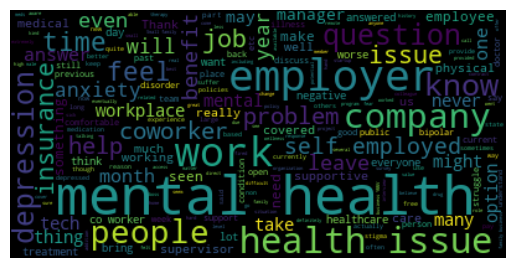

In [29]:
text = ' '.join(comment for comment in raw_df['comments'].dropna())

wordcloud = WordCloud(colormap = 'viridis').generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [30]:
raw_df.drop(columns = ['comments'], inplace = True)

In [24]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   self_employed              1259 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             1259 non-null   object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [31]:
raw_df['no_employees'].value_counts()

no_employees
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: count, dtype: int64

#### Hiện tại, dữ liệu đã không còn chứa giá trị bị thiếu, ta tiến hành xem xét sự phân bố giá trị của từng cột dữ liệu kiểu categorical và nhận xét

In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
raw_df.describe(include = 'object')

,Timestamp,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,1246,3,48,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2
top,2014-08-27 12:44:51,Male,United States,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,2,988,751,1113,767,637,729,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075
